In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data1 = data.copy()

In [4]:
data1.loc[data['Type'] == 1, 'Type'] = 'building_windows_float_processed'
data1.loc[data['Type'] == 2, 'Type'] = 'building_windows_non_float_processed' 
data1.loc[data['Type'] == 3, 'Type'] = 'vehicle_windows_float_processed' 
data1.loc[data['Type'] == 4, 'Type'] = 'vehicle_windows_non_float_processed' 
data1.loc[data['Type'] == 5, 'Type'] = 'containers' 
data1.loc[data['Type'] == 6, 'Type'] = 'tableware' 
data1.loc[data['Type'] == 7, 'Type'] = 'headlamps' 

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [6]:
data1.shape

(214, 10)

In [7]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [8]:
data1.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

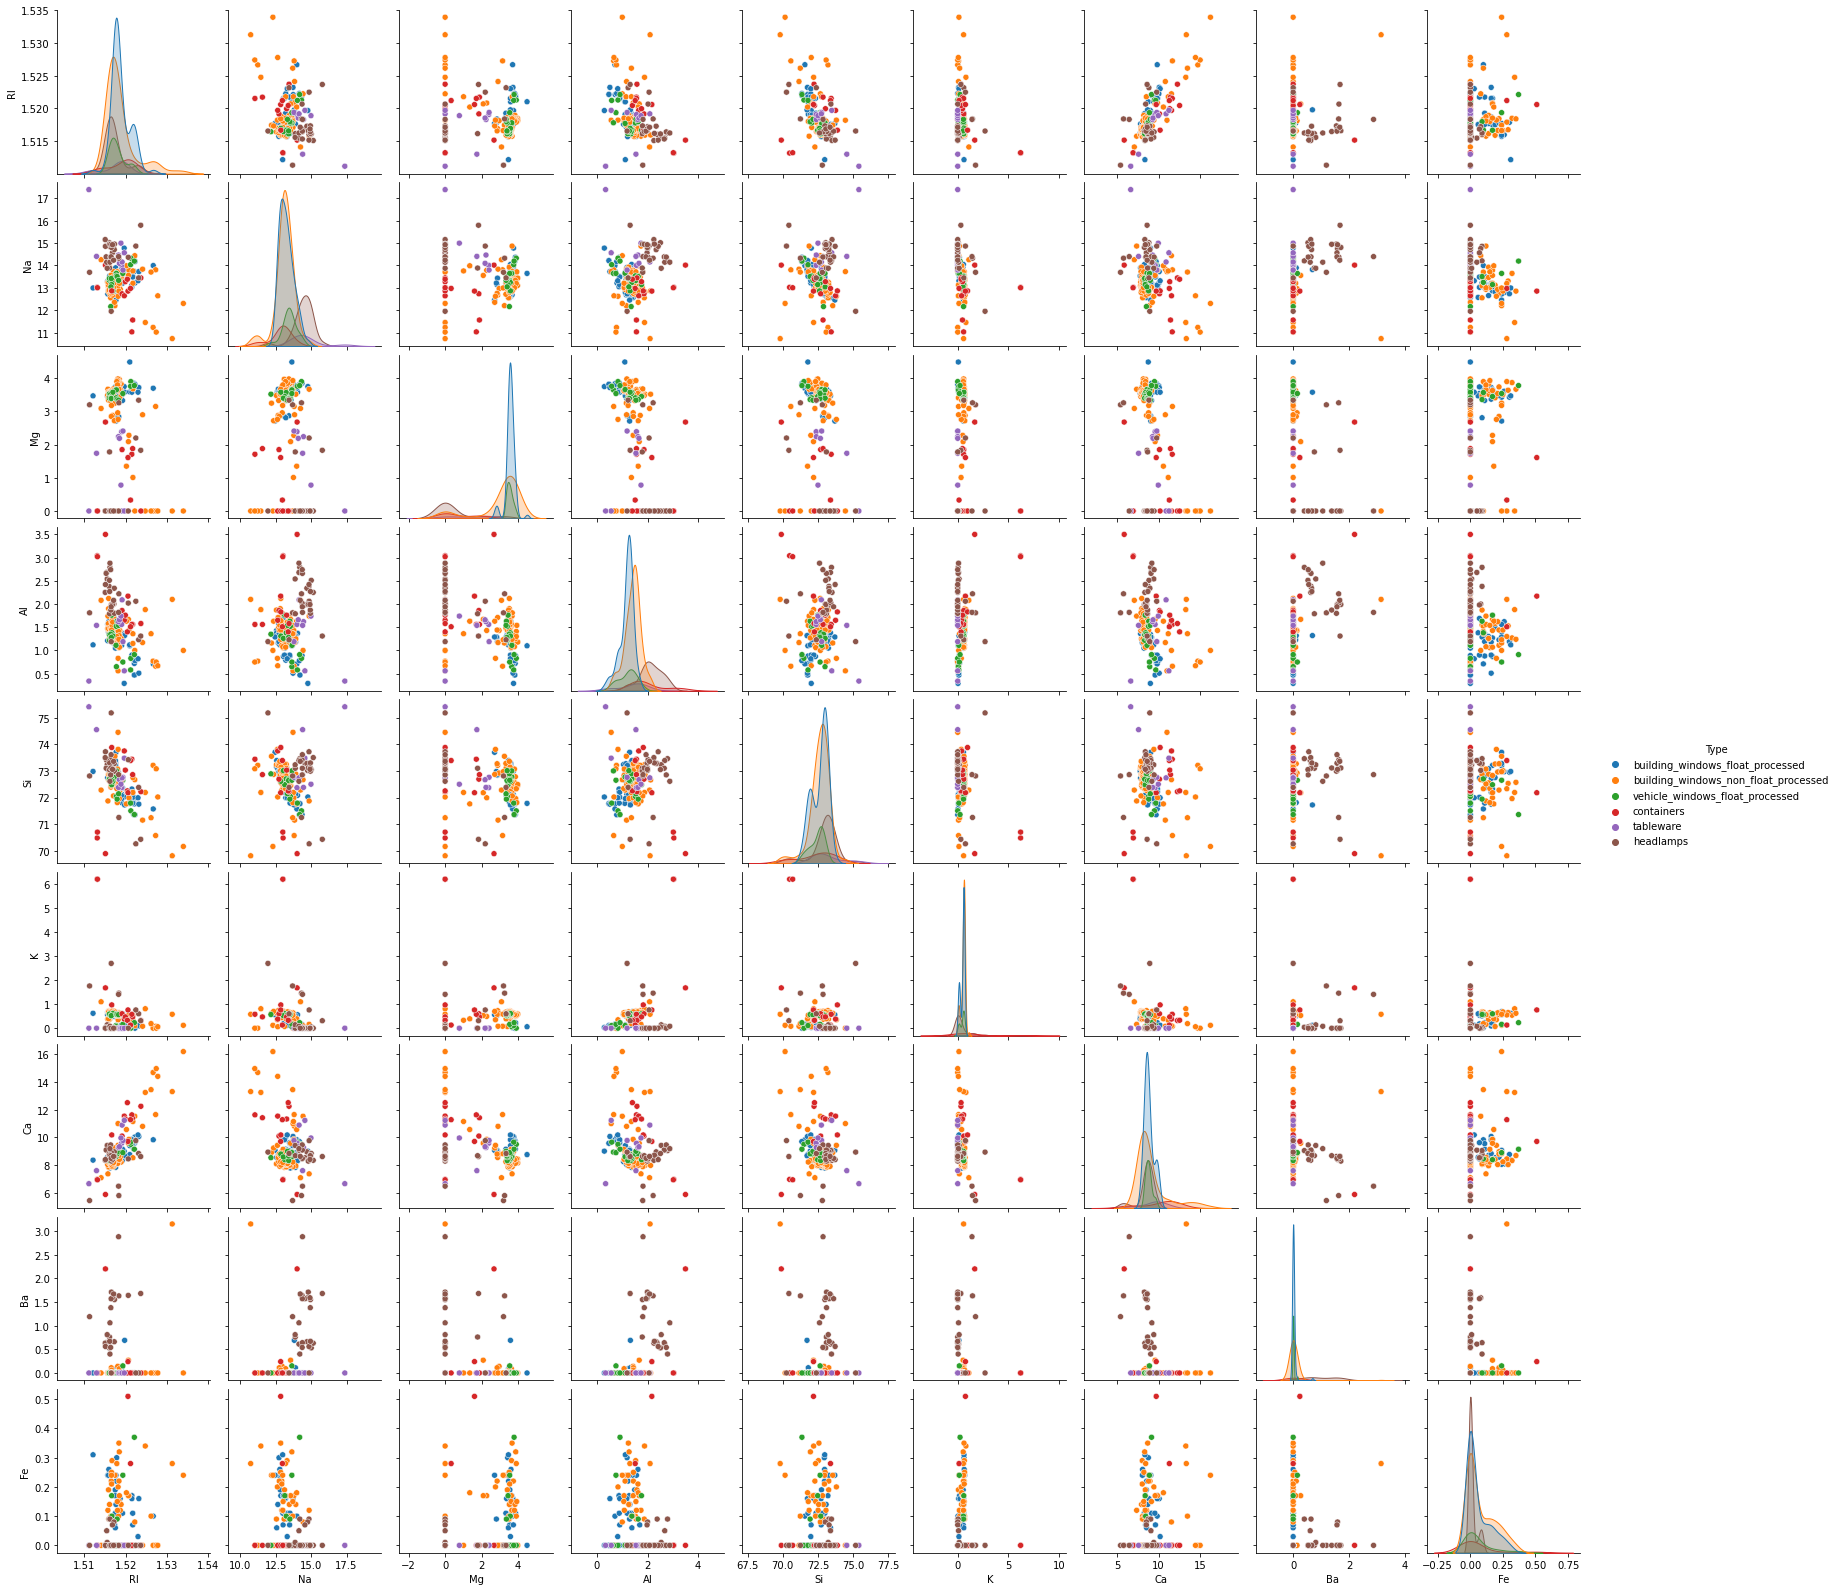

In [9]:
sns.pairplot(data1, hue='Type')

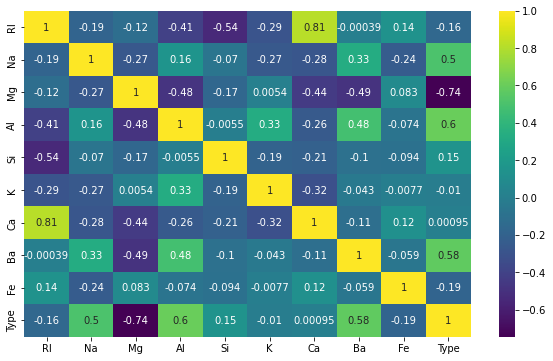

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap='viridis', annot=True)
plt.show()

<AxesSubplot:xlabel='Mg', ylabel='Si'>

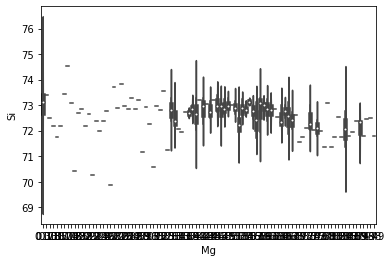

In [11]:
sns.violinplot(data['Mg'], data['Si'])

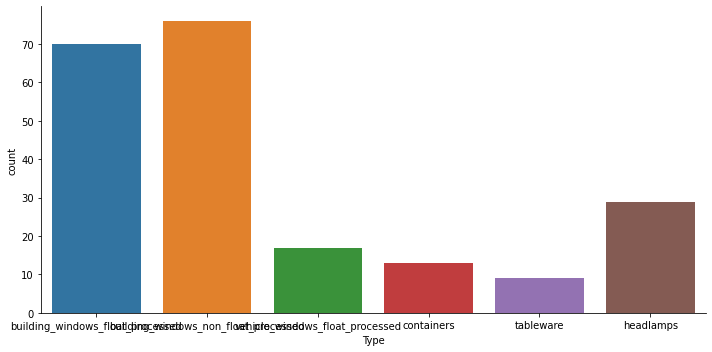

In [14]:
sns.factorplot('Type', data=data1, kind='count', size=5, aspect=2)

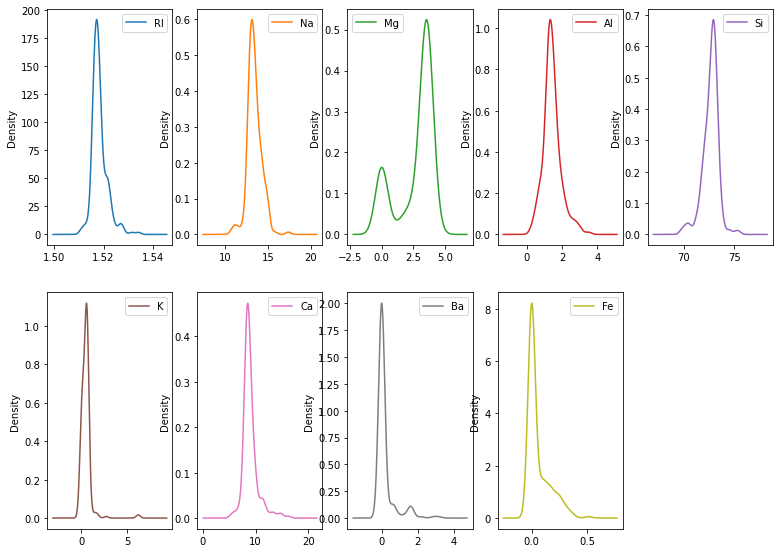

In [15]:
data1.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

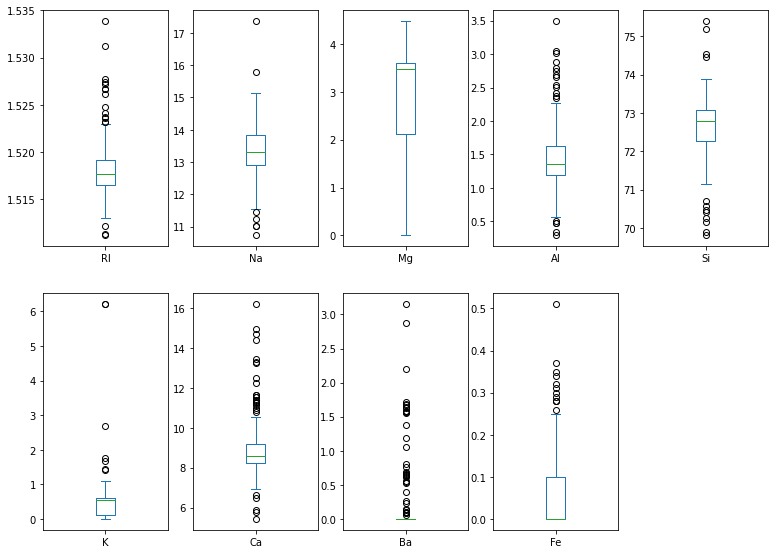

In [16]:
data1.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

## KNN Model Building

In [17]:
X = data.iloc[:, 0:9]
Y = data.iloc[:, -1]

In [18]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [19]:
model = KNeighborsClassifier(n_neighbors = 12)

In [20]:
model.fit(X, Y)

KNeighborsClassifier(n_neighbors=12)

In [21]:
kfold = KFold(n_splits = 8)
res = cross_val_score(model, X, Y, cv = kfold)

In [22]:
res

array([0.51851852, 0.81481481, 0.88888889, 0.37037037, 0.44444444,
       0.22222222, 0.        , 0.        ])

In [23]:
res.mean()

0.4074074074074074

In [24]:
model.predict([[1.51651, 12.65, 1.56, 2.70, 72.50, 0.07, 8.03, 1.16, 0.0]])

array([2], dtype=int64)

In [25]:
#Grid Search for Algorithm Tuning

n_neighbors = list(range(1, 28))
parameters = {'n_neighbors': n_neighbors}

In [27]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27]})

In [28]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


In [29]:
k_range = range(1, 52)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv = 4)
    k_scores.append(scores.mean())

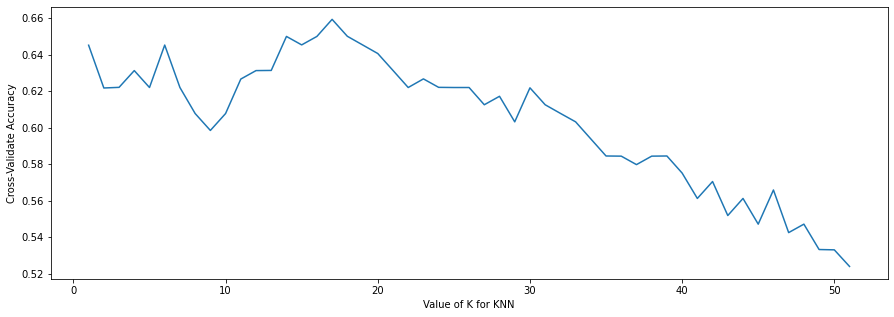

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validate Accuracy')
plt.show()

In [31]:
k_scores

[0.6450908455625437,
 0.621680642907058,
 0.6220300489168414,
 0.6312019566736548,
 0.6219426974143956,
 0.6451781970649895,
 0.6219426974143956,
 0.6077044025157233,
 0.598445143256464,
 0.6077044025157233,
 0.6265723270440252,
 0.6312019566736548,
 0.6312893081761006,
 0.649895178197065,
 0.6452655485674353,
 0.649895178197065,
 0.6592417889587701,
 0.6499825296995109,
 0.6452655485674353,
 0.6405485674353598,
 0.6312893081761005,
 0.6219426974143956,
 0.626659678546471,
 0.6220300489168414,
 0.6219426974143955,
 0.6219426974143955,
 0.6125087351502445,
 0.6171383647798742,
 0.6031621243885396,
 0.6217679944095038,
 0.6125087351502446,
 0.6077917540181691,
 0.6031621243885394,
 0.5938155136268344,
 0.5844689028651292,
 0.5843815513626834,
 0.5797519217330538,
 0.5843815513626834,
 0.5844689028651292,
 0.5751222921034241,
 0.5612334032145353,
 0.5704926624737945,
 0.5518867924528302,
 0.5612334032145353,
 0.5471698113207547,
 0.565863032844165,
 0.5425401816911251,
 0.5471698113207547

In [32]:
data1_accuracy = pd.DataFrame({'Value of k': range(1, 52), 
                              'Accuracy': k_scores})

In [33]:
data1_accuracy

,Value of k,Accuracy
0,1,0.645091
1,2,0.621681
2,3,0.622030
3,4,0.631202
4,5,0.621943
5,6,0.645178
6,7,0.621943
7,8,0.607704
8,9,0.598445
9,10,0.607704


In [34]:
data1_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
16,17,0.659242
17,18,0.649983
15,16,0.649895
13,14,0.649895
18,19,0.645266
14,15,0.645266
5,6,0.645178
0,1,0.645091
19,20,0.640549
12,13,0.631289
